In [59]:
import tensorflow


In [60]:
from tensorflow.keras.datasets import mnist

In [61]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [62]:
x_train= x_train/255
x_test= x_test/255

In [63]:
y_train= to_categorical(y_train,num_classes=10)

In [64]:
y_test= to_categorical(y_test,num_classes=10)

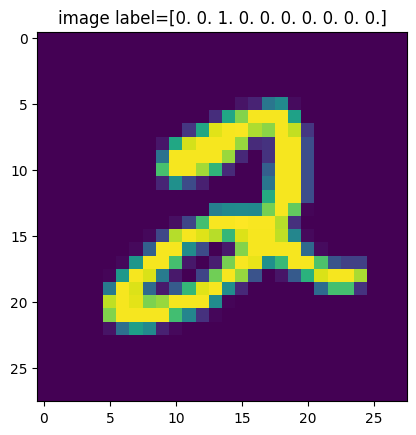

In [65]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label={y_train[5]}")
plt.show()

Matplot library is used for data visualization

the image contains
 28*28 pixels

In [66]:
 from tensorflow.keras.layers import Dense , Flatten
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.utils import to_categorical


sequential model refers to alignment of input hidden and output layer in an sequencial manner


one to one architecture movement of data in one direction i.e for one input one output


Flattening layer transforms 2d matrix into a falttended layer 2d  matrix to 1d array input contains 784 layers

 Dense layer is used for feed forward neural networks which all the neurons from one layer are connected to all the nodes of subsequent layer number defines number of neurons dense refers to hidden layer and output layer with activation functions like relu and softmax to bring non linearity in data for multilevel we use softmax for binary we use sigmoid


In [67]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(5,activation= "relu"),
    Dense(10,activation= "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

bias is also considered in finding all the parameters 785*5+
5*10+10=
3985


In [69]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics= ["accuracy"])

metrics measures performance loss calculates total loss for each iteration how shall be back propagation is optimized for best optimed we use adam

In [70]:
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2 )

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.6815 - loss: 0.9812
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8184 - loss: 0.6044
Epoch 3/5
1875/1875 - 3s - 1ms/step - accuracy: 0.8621 - loss: 0.4798
Epoch 4/5
1875/1875 - 3s - 1ms/step - accuracy: 0.8833 - loss: 0.4155
Epoch 5/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8888 - loss: 0.3946


epochs refers to number of time total dataset is iterated batch size refers to in a single selection we take 32 parts as a batch and apply loss and optimizer function on batches by applying back propagation in parallel manner


60000/32 = 1875 batches run simultaneously for each iteration


In [72]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8794 - loss: 0.4331


[0.3864555358886719, 0.8921999931335449]

loss is 0.3864
accuracy 0.8921

In [73]:
model.get_weights()


[array([[ 0.08373204,  0.05408341, -0.07271647,  0.03223937,  0.07560349],
        [-0.07319263,  0.03559703, -0.01140746, -0.03459173,  0.05014865],
        [-0.05019457, -0.05898835, -0.01246226,  0.04486367, -0.03131331],
        ...,
        [ 0.0098398 , -0.00363719, -0.01382805, -0.07751416, -0.05492587],
        [ 0.00104766, -0.00815853,  0.05538474,  0.02911848,  0.03224126],
        [ 0.06601308, -0.01115929,  0.05282003, -0.00734641,  0.0265928 ]],
       dtype=float32),
 array([ 0.57613826,  0.79365695,  0.7262848 ,  0.3284418 , -0.06569645],
       dtype=float32),
 array([[-0.32420245, -1.02814   , -0.97414106, -0.28543133, -0.28248364,
         -0.37839645, -1.4699242 ,  0.76148635, -0.07600058,  0.62215066],
        [ 0.6410002 ,  0.8632214 , -0.73887515,  0.20339091, -0.34189746,
          0.6014599 ,  0.29615626,  0.37511158, -0.97031605, -0.72785425],
        [-0.4285454 , -0.08525041, -0.32295167, -0.8759728 ,  1.2866324 ,
         -0.0092542 ,  1.1708764 , -0.760857